
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

&nbsp; a) Load the mpg dataset using seaborn. (*)

&nbsp; b) Use your data analysis skills to perform EDA. (*)

&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)

&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

&nbsp; g) Now use early stopping to tune the number of epochs. (*)

&nbsp; h) Train on all training data and validation data. (*)

&nbsp; i) Predict on test data and evaluate. (*)

&nbsp; j) Can you create an MLP model that beats random forest for this dataset? (**)

<details>

<summary>Hint</summary>

d) Perhaps some statistical analysis and visual comparison of similar samples? Also combine with domain skills. 

f) Decide how to do systematic testing and document them.

j) Don't forget about classical machine learning models that we learned in the last course, in many cases they can outperform neural networks. You need to pick the right model for the right problem.

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [2]:
import seaborn as sns
from seaborn import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:
auto = load_dataset('mpg')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# remove missing values
auto_no_nan = auto.dropna()

<Axes: >

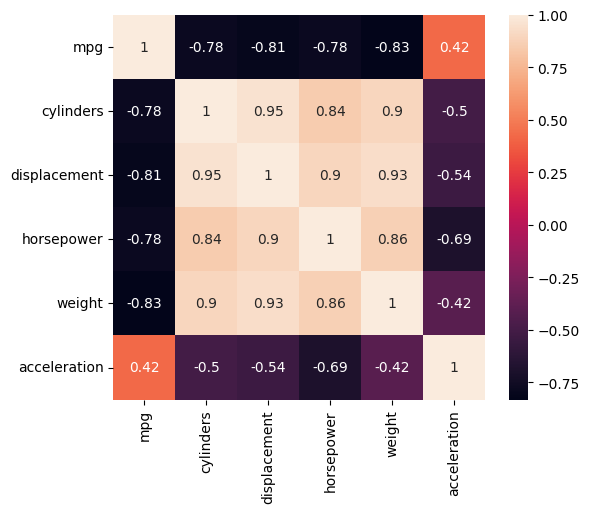

In [7]:
corr = auto_no_nan[['mpg','cylinders','displacement','horsepower','weight','acceleration']].corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True)

Horsepower är mest korrelerat till displacement (och antal cylindrar). Gör en multipel linjär regression, för att fylla i de saknade värdena.

In [8]:
# Define features (independent variables) and target (dependent variable)
X = auto_no_nan[["displacement","cylinders"]]  # Features
y = auto_no_nan["horsepower"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# View the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.35527886 -1.65348604]
Intercept: 44.19610787329522


In [10]:
X_test.iloc[0]

displacement    96.0
cylinders        4.0
Name: 79, dtype: float64

In [11]:
y_pred = model.predict(X_test)
y_pred

array([ 71.68893409,  80.57090554,  69.9125398 ,  69.9125398 ,
        87.32120385,  72.04421294, 173.07976282,  72.04421294,
       114.21293471,  61.74112606, 169.52697423,  89.69869349,
       155.3158199 ,  72.04421294,  92.1856455 ,  77.37339582,
       104.62040554,  75.95228039,  80.57090554,  80.9261844 ,
       104.62040554,  72.04421294,  69.9125398 , 140.038829  ,
        65.6491935 ,  72.3994918 ,  80.21562668, 114.21293471,
        72.04421294,  80.57090554, 155.3158199 , 116.69988672,
       125.82767467,  80.21562668, 173.07976282,  69.9125398 ,
       138.26243471,  72.22185237, 138.26243471, 158.86860849,
       140.038829  ,  69.55726094,  74.88644381,  72.04421294,
       155.67109876, 187.29091715, 123.09490617,  69.9125398 ,
        87.32120385,  69.55726094, 155.67109876,  77.72867468,
        87.32120385,  80.21562668, 116.69988672, 125.93713703,
       124.05128038, 116.69988672,  74.53116495,  77.72867468,
       192.62010002, 116.69988672,  95.73843408,  80.21

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 253.03821237406552
R-squared: 0.8361338874123327


In [13]:
predict = model.predict([[307.0,8]])
predict

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([140.038829])

In [14]:
auto[auto['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [15]:
# Loop through each row in the auto dataframe
for index, row in auto.iterrows():
    if pd.isna(row['horsepower']):
        # Predict the horsepower using the linear model
        predicted_hp = model.predict([[row['displacement'], row['cylinders']]])[0]
        # Update the dataframe with the predicted value
        auto.at[index, 'horsepower'] = predicted_hp

# Display the updated dataframe
auto.head()

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.p

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Kolla att de ursprungligen saknade värden har värden.

In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


E. Train | Val | Test split

In [17]:
X = auto[["displacement","cylinders","horsepower","weight","acceleration","model_year",]]  # Features
y = auto["mpg"]  # Target
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Kollar shape på de olika dataseten:

In [18]:
for var in [X_train, X_valid, X_test, y_train, y_valid, y_test]:
    print(f'Shape: {var.shape}')
          

Shape: (318, 6)
Shape: (40, 6)
Shape: (40, 6)
Shape: (318,)
Shape: (40,)
Shape: (40,)


Normaliserar med MinMax scaler.

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

In [20]:
import keras
from keras import layers

In [22]:
model = keras.models.Sequential(name="Shallow_network")
model.add(layers.InputLayer((X_train.shape[1],), name="input_layer"))
#model.add(layers.InputLayer((6,), name="input_layer"))
model.add(layers.Dense(512, activation='relu', name="hidden-layer-1"))
model.add(layers.Dense(32, activation='sigmoid', name="hidden-layer-2"))
model.add(layers.Dense(1, name="output-layer"))


In [23]:
from keras.optimizers import SGD

model.compile(loss="mean_squared_error",
                      optimizer=SGD(learning_rate=.01))

#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "Shallow_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)          │ (None, 512)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-2 (Dense)          │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 350.2304 - val_loss: 41.8514
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.3188 - val_loss: 18.0973
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.2816 - val_loss: 9.5823
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0550 - val_loss: 9.0147
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6136 - val_loss: 10.0750
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.8094 - val_loss: 9.5246
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5994 - val_loss: 8.2422
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3301 - val_loss: 11.5404
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3731 - val_loss: 8.7899
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9018 - val_loss: 7.7079
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5384 - val_loss: 7.9020
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

In [28]:
print(model.history.history.keys())
print(model.history.history['loss'])
print(model.history.history['val_loss'])

dict_keys(['loss', 'val_loss'])
[207.31512451171875, 44.65529251098633, 22.912199020385742, 16.083751678466797, 14.518804550170898, 13.65150260925293, 12.381680488586426, 11.985771179199219, 11.69682502746582, 12.169967651367188, 10.31662368774414, 10.0126953125, 10.12913990020752, 9.803369522094727, 9.834644317626953, 9.666145324707031, 9.028546333312988, 9.864581108093262, 9.224241256713867, 8.90235424041748, 10.005021095275879, 10.175189018249512, 9.097443580627441, 9.54230785369873, 8.782493591308594, 9.802565574645996, 9.057369232177734, 8.414617538452148, 8.774027824401855, 11.506184577941895, 8.986979484558105, 8.595065116882324, 9.12558650970459, 8.205655097961426, 8.296530723571777, 8.769414901733398, 9.558801651000977, 9.113814353942871, 8.612833976745605, 8.448041915893555, 8.265800476074219, 8.014603614807129, 8.396507263183594, 8.779903411865234, 7.966688632965088, 8.251041412353516, 8.784357070922852, 8.089420318603516, 7.887185573577881, 8.604458808898926]
[41.8513717651

<Axes: title={'center': 'Loss vs. Epochs'}, xlabel='Epochs', ylabel='Loss'>

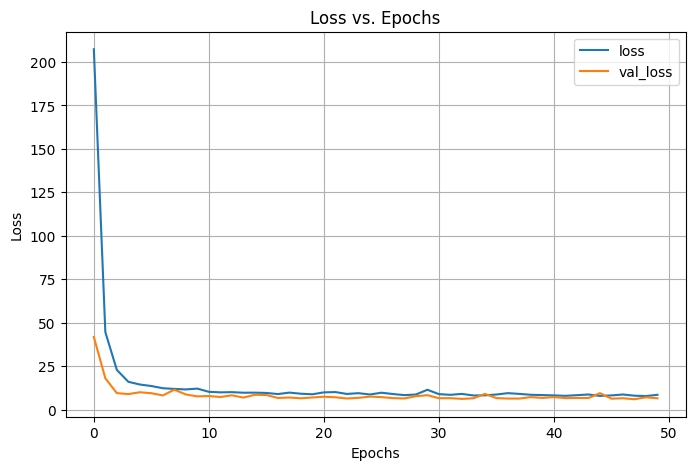

In [33]:
pd.DataFrame(model.history.history).plot(figsize=(8,5), grid=True, title="Loss vs. Epochs", xlabel="Epochs", ylabel="Loss")

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---